# TP3 

### 1)

In [1]:
#%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import t
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix

df= pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv", ",", header=None)
df.head(5)




,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


Il y a 211 colonnes dans le dataset dont une de label, ce qui fait 210 variables explicatives avec 442 observations.

In [2]:
df.shape

(442, 211)

Il y a 211 colonnes dans le dataset dont une de label, ce qui fait 210 variables explicatives avec 442 observations.

In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,...,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,7.535450e-19,-1.507090e-17,5.494599e-20,-7.284269e-18,8.288995e-18,-2.712762e-17,1.971776e-17,8.540177e-18,1.029845e-17,4.018907e-18,...,-2.260635e-18,-2.637408e-17,-5.023634e-19,-1.538488e-17,5.525997e-18,3.265362e-17,1.507090e-17,-4.034606e-18,1.205672e-17,152.133484
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,...,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,77.093005
min,-3.149247e+00,-2.862871e+00,-3.057543e+00,-2.856903e+00,-3.102347e+00,-2.782344e+00,-2.825318e+00,-3.626525e+00,-2.834007e+00,-2.695861e+00,...,-3.059475e+00,-3.206539e+00,-2.585325e+00,-3.561763e+00,-3.167962e+00,-2.751207e+00,-3.028940e+00,-2.675447e+00,-2.918321e+00,25.000000
25%,-6.707870e-01,-7.128394e-01,-7.160981e-01,-6.715474e-01,-6.732232e-01,-6.951004e-01,-6.986587e-01,-6.387691e-01,-6.666746e-01,-6.930021e-01,...,-6.885118e-01,-5.793321e-01,-6.282190e-01,-6.190946e-01,-7.359866e-01,-6.374872e-01,-6.472739e-01,-7.025578e-01,-6.378171e-01,87.000000
50%,3.819503e-02,6.217421e-02,4.739406e-02,6.565749e-05,-6.111315e-03,-1.345167e-02,-4.823057e-02,4.016636e-02,6.047571e-04,3.602406e-02,...,-2.994795e-02,2.540540e-02,-2.229024e-02,-6.087758e-03,7.677091e-03,-3.123603e-03,2.444578e-02,-4.187834e-02,-8.099075e-02,140.500000
75%,6.748497e-01,6.244547e-01,6.975121e-01,6.881971e-01,7.026457e-01,7.155790e-01,7.200217e-01,5.788436e-01,6.298078e-01,6.629150e-01,...,6.672697e-01,6.676636e-01,5.985077e-01,7.406183e-01,7.000447e-01,6.440062e-01,6.313916e-01,6.929876e-01,7.249269e-01,211.500000
max,2.547051e+00,2.567177e+00,2.965824e+00,3.057612e+00,3.173713e+00,3.137950e+00,3.199205e+00,3.616718e+00,3.099090e+00,3.032505e+00,...,2.677458e+00,2.806877e+00,3.255462e+00,2.811911e+00,2.838960e+00,3.351254e+00,2.734481e+00,3.637684e+00,2.710260e+00,346.000000


Les données sont centrées et normalisées

In [4]:
Xdf = df.drop([210], 1)
ydf = df[210]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f5bd4a8>,
      dtype=object)

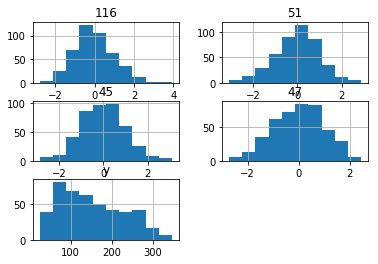

In [5]:
randomX= df.sample(4, axis=1)
randomX["y"]=ydf
randomX.hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17e285c0>,
      dtype=object)

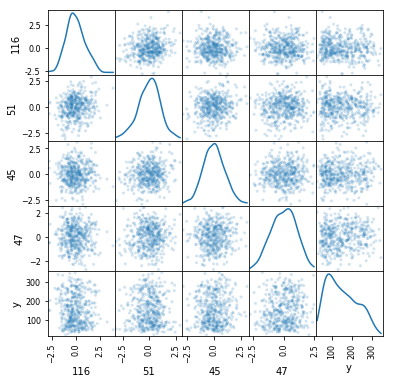

In [6]:
scatter_matrix(randomX, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [7]:
print(Xdf.corr())

          0         1         2         3         4         5         6    \
0    1.000000 -0.142086 -0.041896 -0.302272  0.138538  0.152145 -0.060964   
1   -0.142086  1.000000  0.089454 -0.238143 -0.118706 -0.100456  0.147430   
2   -0.041896  0.089454  1.000000 -0.187086  0.140798 -0.073608 -0.077142   
3   -0.302272 -0.238143 -0.187086  1.000000  0.011364 -0.073047  0.146828   
4    0.138538 -0.118706  0.140798  0.011364  1.000000 -0.022188  0.004966   
5    0.152145 -0.100456 -0.073608 -0.073047 -0.022188  1.000000  0.130087   
6   -0.060964  0.147430 -0.077142  0.146828  0.004966  0.130087  1.000000   
7   -0.177809 -0.121557  0.027821 -0.076386  0.182345 -0.052477  0.110220   
8    0.006485  0.039698 -0.058874  0.074364  0.005433 -0.091883  0.115545   
9   -0.052305 -0.111136 -0.148022  0.020403  0.122424 -0.016487  0.140464   
10   0.060395  0.030769 -0.030835  0.158846  0.318980  0.221810  0.069571   
11   0.087233  0.107220 -0.019702 -0.120754 -0.098285  0.153313 -0.060768   

In [8]:
X_train, X_test, y_train, y_test = train_test_split(np.array(Xdf), np.array(ydf), test_size=0.2)

In [9]:
#corrMatrix= Xdf.corr()

U, S, V = np.linalg.svd(X_train) 
eigvals = S**2 / np.cumsum(S)[-1]

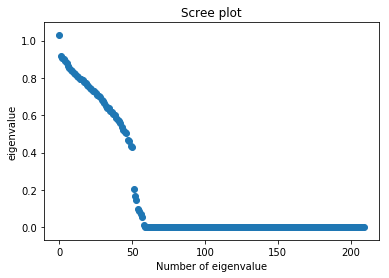

In [10]:
plt.figure()
plt.scatter(np.arange(len(eigvals)),eigvals)
plt.xlabel("Number of eigenvalue")
plt.ylabel("eigenvalue")
plt.title("Scree plot")
plt.show()


In [11]:
U_train, S_train, V_train = np.linalg.svd(X_train) 
eigvals = S_train**2 / np.cumsum(S_train)[-1]
print(U_train.size)

124609


In [12]:
Uk = U_train[:,:60]

Sk = np.diag(S_train)[:60,:60]
Vk = V_train.T[:,:60]
#print(np.sqrt(Sk))
Xpca = X_train@Vk
print("checking dimensions " +str(Xpca.size) +"  "+str(X_train.size))

checking dimensions 21180  74130


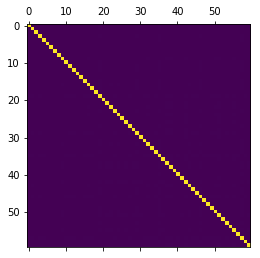

In [13]:
plt.matshow(pd.DataFrame(Xpca).corr())

In [14]:
# CHoix de sklearn
regpca = LinearRegression()
print(Xpca.shape)
print(y_train.shape)
regrpca = regpca.fit(Xpca, y_train)

(353, 60)
(353,)


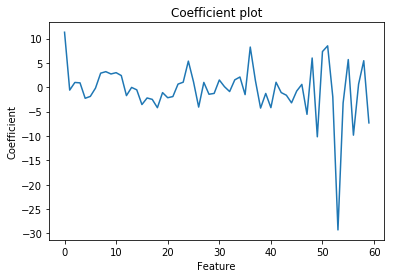

In [15]:

plt.figure()
#plt.scatter(np.arange(0,len(reg.coef_)),reg.coef_)
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Coefficient plot")
plt.plot(regrpca.coef_)
plt.show()

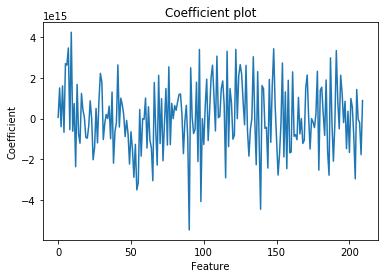

In [16]:

reg = LinearRegression()
regr = reg.fit(X_train, y_train)
plt.figure()
#plt.scatter(np.arange(0,len(reg.coef_)),reg.coef_)
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Coefficient plot")
plt.plot(regr.coef_)
plt.show()

In [17]:
print(regr.intercept_)
print(regrpca.intercept_)

152.48871281869688
152.7402232586055


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std=scaler.fit(Xpca)
XpcaStd=scaler.transform(Xpca)
regpcaStd = LinearRegression()
regrpcaStd = regpcaStd.fit(XpcaStd, y_train)
print(regrpcaStd.intercept_)
print(y_train.mean())

152.47308781869688
152.47308781869688


In [19]:
print(y_test.shape)
predictionpca = regrpca.predict(X_test@Vk)
prediction= regr.predict(X_test)

(89,)


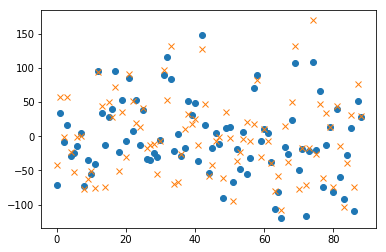

In [20]:
plt.figure()
plt.plot(y_test-predictionpca, "o")
plt.plot(y_test-prediction, "x")
plt.show()

In [21]:
regrpca.score(X_test@Vk, y_test)

0.48724258932206593

In [22]:
regr.score(X_test, y_test)

0.4622289030943605

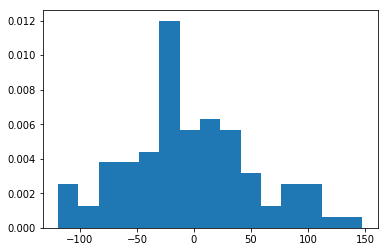

In [23]:
plt.figure()
plt.hist(y_test-predictionpca, bins=15, density=True)

plt.show()

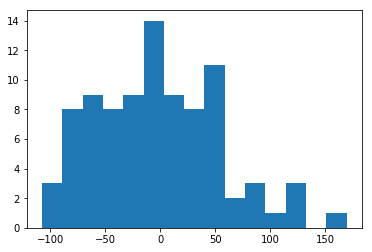

In [24]:
plt.figure()
plt.hist(y_test-prediction, bins=15)

plt.show()

In [25]:
#x_train.describe()

In [40]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler


X_trainfwd= np.append(np.ones((X_train.shape[0],1)), X_train, axis=1)
#std_scaler = StandardScaler().fit(X_train)
#X_trainfwd = std_scaler.transform(X_train)
#x_trainfwd=pd.DataFrame(X_trainfwd)
#x_trainfwd.describe()






In [53]:
from scipy.stats import t

def forward_selection(Xfwd, threshold=1):

    p=Xfwd.shape[1]
    n=Xfwd.shape[0]
    r= y_train
    test = np.zeros((p,p))
    pval_mem = np.zeros(p)
    pval = np.zeros((p,p))
    resids = y_train
    var_sel = []
    var_remain = list(range(p))
    in_test = []
    regr = LinearRegression(fit_intercept = False)
    
    for k in range(p): 
        resids_mem = np.zeros((p,n))

        for i in var_remain:
            xtmp = Xfwd [:,[i]]
            regr.fit(xtmp , resids)

            #calcul de (x'x)
            xx = np.sum( Xfwd [:,[i]] ** 2 )    
            resids_mem [i,:] = regr.predict(xtmp) - resids
            sigma2_tmp = np.sum (resids_mem [i,:] ** 2) / xx
            test[k,i] = np.sqrt(n) * np.abs(regr.coef_) / (np.sqrt( sigma2_tmp )) 
            pval[k,i] =   2 * (1 - norm.cdf(test[k,i]))

        ####separe en deux vecteurs la listes des variables séléctionnées et les autres
        best_var = np.argmax(test[k,:])
        var_sel.append(best_var)
        resids = resids_mem[best_var,:]
        if pval[k,best_var] > threshold:
            break
        pval_mem [k] = pval[k,best_var]
        var_remain = np.setdiff1d(var_remain,var_sel)
        
    print(var_sel)
    return var_sel, test, pval_mem

v,t,p= forward_selection(X_trainfwd)

[0, 59, 124, 186, 134, 168, 130, 209, 157, 136, 175, 161, 160, 115, 50, 129, 94, 188, 111, 195, 100, 28, 190, 91, 51, 35, 81, 17, 42, 184, 132, 180, 125, 31, 112, 11, 142, 66, 99, 148, 105, 12, 114, 145, 18, 24, 170, 120, 23, 89, 41, 80, 43, 87, 33, 206, 141, 208, 177, 72, 29, 96, 155, 5, 36, 102, 127, 119, 169, 178, 15, 98, 154, 67, 201, 93, 205, 187, 179, 4, 189, 131, 207, 97, 159, 167, 13, 121, 37, 171, 122, 83, 38, 202, 14, 106, 108, 60, 82, 22, 144, 152, 138, 182, 76, 110, 61, 166, 163, 173, 196, 104, 153, 95, 137, 210, 70, 199, 64, 198, 113, 183, 63, 181, 74, 146, 174, 47, 44, 48, 101, 79, 56, 165, 139, 172, 158, 200, 204, 57, 92, 25, 88, 116, 192, 149, 27, 143, 6, 62, 30, 8, 9, 117, 75, 68, 26, 19, 54, 133, 7, 49, 191, 46, 53, 197, 164, 39, 65, 2, 109, 90, 16, 85, 1, 69, 147, 123, 21, 103, 55, 193, 84, 32, 86, 128, 52, 3, 10, 118, 176, 78, 203, 156, 71, 162, 194, 58, 77, 45, 40, 140, 107, 185, 20, 151, 126, 34, 73, 150, 135]


In [42]:
print(len(var_sel))
print(pval_mem)

211
[0.00000000e+00 0.00000000e+00 5.52224932e-13 9.75850083e-03
 2.46514736e-02 2.70219604e-02 2.82458711e-02 3.43047492e-02
 3.91307138e-02 5.71217696e-02 1.22756389e-02 8.12809951e-02
 9.35880128e-02 9.72258597e-02 1.25846705e-01 1.19884475e-01
 1.71869495e-01 1.58255851e-01 1.88285470e-01 2.45472338e-01
 3.49716229e-01 3.46953105e-01 4.09644326e-01 4.66812969e-01
 4.75615956e-01 4.73653809e-01 4.50593859e-01 4.68641361e-01
 5.18812915e-01 5.62271845e-01 5.63577071e-01 5.39199826e-01
 5.84226513e-01 6.25379619e-01 6.04956933e-01 6.34206600e-01
 6.64203554e-01 6.88846148e-01 7.62787781e-01 7.68284655e-01
 7.71276111e-01 7.88332014e-01 8.17338542e-01 8.31146919e-01
 8.25060515e-01 8.43272957e-01 8.49860006e-01 8.50846821e-01
 8.58675551e-01 8.54249843e-01 8.51999538e-01 8.55393643e-01
 8.73876437e-01 8.75010298e-01 9.09113452e-01 9.10057523e-01
 9.16426680e-01 9.17023283e-01 9.31406687e-01 9.35976219e-01
 9.35142861e-01 9.35435309e-01 9.47151952e-01 9.48953435e-01
 9.55037842e-01 9.59

In [54]:
varfwd_selected,stats,pvalues = forward_selection(X_trainfwd, 0.1)

[0, 59, 124, 186, 134, 168, 130, 209, 157, 136, 175, 161, 160, 115, 50]


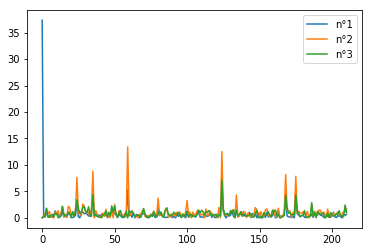

In [62]:
plt.plot(stats[0], label="n°1")
plt.plot(stats[1],label="n°2")
plt.plot(stats[2],label="n°3")
plt.legend()
plt.show()

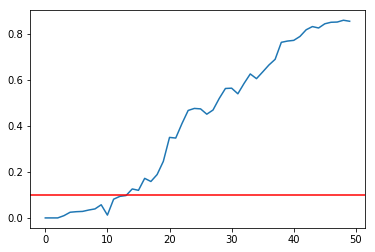

In [66]:
plt.plot(p[0:50], label="n°1")
plt.axhline(y=0.1, color='r', linestyle='-')
plt.show()

In [67]:
print(varfwd_selected)

[0, 59, 124, 186, 134, 168, 130, 209, 157, 136, 175, 161, 160, 115, 50]


In [69]:
Xfwd=X_trainfwd[:, varfwd_selected]
pd.DataFrame(Xfwd).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,-0.198452,2.509064,-0.843104,1.066269,1.038898,-0.796881,0.694167,-0.814650,1.065488,-0.293235,1.237560,-0.528178,-0.548089,0.073255
1,1.0,-0.379729,0.005708,0.613387,-0.437974,-0.698275,0.407998,-0.975814,-0.089387,1.065488,-1.531667,-1.470561,-0.035014,-0.105039,1.825230
2,1.0,1.251769,-0.521205,-1.997322,-0.466902,1.183662,0.716495,1.783514,-0.334596,1.065488,-0.680245,-0.532241,0.194691,-0.701741,-0.079022
3,1.0,-0.583667,1.388584,-0.191263,1.008414,0.170311,0.076014,-0.663984,-1.549020,1.065488,-0.602843,1.057786,-1.062679,-1.040244,0.228904
4,1.0,-0.311750,-0.108174,0.672425,-1.247951,1.231917,1.367079,-0.260459,0.548833,1.065488,-1.299461,-0.512535,-0.272907,-0.973504,-0.303169


In [74]:
gram= Xfwd.T@Xfwd
B= np.linalg.inv(gram).dot(Xfwd.transpose().dot(y_train))
ypred= Xfwd@B
prediction_error= np.sum((y_train-ypred)**2)
print(prediction_error)

949697.5654541779


In [75]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=4)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):

SyntaxError: unexpected EOF while parsing (<ipython-input-75-7aa547c2a216>, line 5)

In [29]:
x_train=pd.DataFrame(X_train)
X_trainpwd= np.append(np.ones((X_train.shape[0],1)), X_train, axis=1)
p=X_trainpwd.shape[1]
n=X_trainpwd.shape[0]
r= y_train
regfwd = LinearRegression(fit_intercept = False)
#print(r.shape)
forwardselection=[]
var_remain = list(range(p))
print(var_remain)
var_sel = []
x_train.head()
for i in range(p):
    resids_mem = np.zeros((p,n))
    tstats= []
    print(i)
    print(np.sum(r**2))


    for j in var_remain:
        #print("i"+str(i)+"j"+str(j))
        xk= X_trainpwd[:,j].reshape((n,1))
        #print(xk.shape)
        #graminv= np.linalg.inv(xk.T@xk)
        xx = np.sum( xk ** 2 )
        
        regrfwd = regfwd.fit(xk, r)
        #print(regrfwd.coef_*xk)
        #print(r.shape)
        resids_mem[j,:] = regfwd.predict(xk) - r
        
        #print(np.sum(resids_mem[j,:]**2))
        
        sigma2_tmp = np.sum(resids_mem[j,:]**2)/ xx
        if sigma2_tmp!=0:
            tstat= np.sqrt(n) * np.abs(regrfwd.coef_) / (np.sqrt( sigma2_tmp ))
            tstats.append(tstat)
    tstatsa=np.array(tstats)
    best_var=tstatsa.argmax()
    r=resids_mem[best_var,:]
    var_sel.append(best_var)
    var_remain = np.setdiff1d(var_remain,var_sel)
    forwardselection.append(tstatsa.argmax())
print(forwardselection)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210]
0
10285745.0
1
2079185.9943342777
2
2078355.7248129726

ValueError: attempt to get argmax of an empty sequence

In [ ]:
i=0
ecartype= np.std(X_train, axis=0)
tstats =regr.coef_/ecartype
tstats.shape
print(tstats[40])
tstats.argmax()
tstats